In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

In [2]:
train=pd.read_csv(r'G:\Essentials\Cross Sell Pred\train.csv')
test=pd.read_csv(r'G:\Essentials\Cross Sell Pred\test.csv')

In [3]:
print("Shape of train set is",train.shape)
print("Shape of test set is",test.shape)

Shape of train set is (381109, 12)
Shape of test set is (127037, 11)


In [4]:
train.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [5]:
train.head(30)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


<p>Gender, Vehicle_Age and Vehicle_Damage needs to be decoded</p>

Text(0.5, 1.0, "Ratio of 0's and 1's")

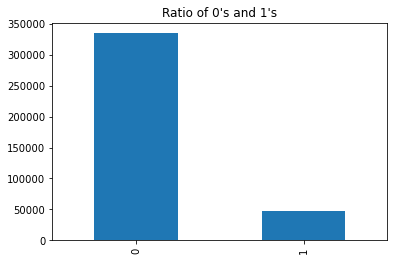

In [6]:
train['Response'].value_counts().plot(kind='bar')
plt.title("Ratio of 0's and 1's")

<p>Oversampling needs to be done</p>

In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [9]:
print('Male % is', 206089/381109)
print('Female % is', 175020/381109)



Male % is 0.5407613045086839
Female % is 0.45923869549131613


In [10]:
train['Gender'].replace('Male',1,inplace=True)
train['Gender'].replace('Female',0,inplace=True)

In [11]:
train['Vehicle_Damage'].replace('Yes',1,inplace=True)
train['Vehicle_Damage'].replace('No',0,inplace=True)

<li>Male is decoded as 1 and Female is decoded as 0</li>
<li>Yes is decoded as 1 and No is decoded as 0</li>

In [12]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


<AxesSubplot:>

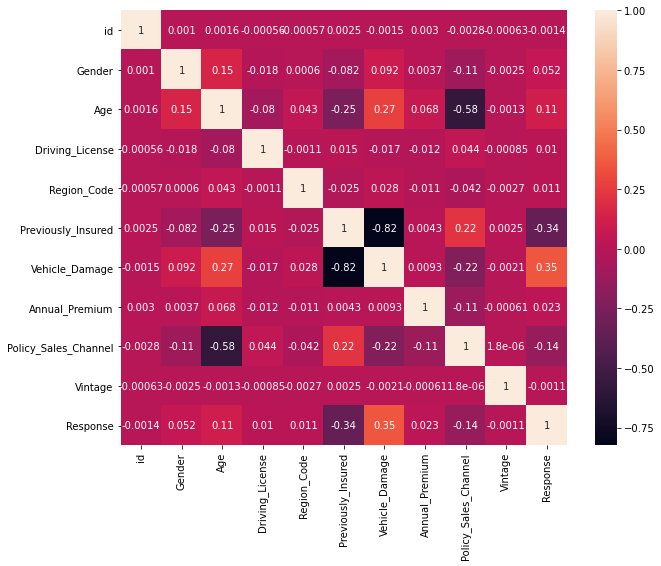

In [13]:
map=train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(map,annot=True)

Text(0, 0.5, 'Age frequency')

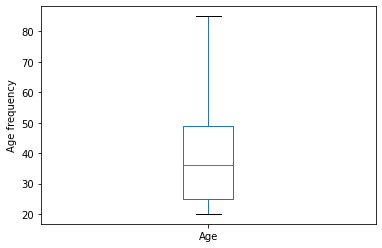

In [14]:
train['Age'].plot(kind='box')
plt.ylabel('Age frequency')

In [15]:
train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [16]:
train['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
train['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
train['Vehicle_Age'].replace('> 2 Years',2,inplace=True)

<li> 1-2 year is decoded as 0 </li>
<li> less than 1 year is decoded as 1 </li>
<li> greater than 2 year is decoded as 2 </li>

In [17]:
train['Vehicle_Age'].value_counts()

0    200316
1    164786
2     16007
Name: Vehicle_Age, dtype: int64

In [18]:
train.head(20)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
5,6,0,24,1,33.0,0,1,1,2630.0,160.0,176,0
6,7,1,23,1,11.0,0,1,1,23367.0,152.0,249,0
7,8,0,56,1,28.0,0,0,1,32031.0,26.0,72,1
8,9,0,24,1,3.0,1,1,0,27619.0,152.0,28,0
9,10,0,32,1,6.0,1,1,0,28771.0,152.0,80,0


In [19]:
train.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [20]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

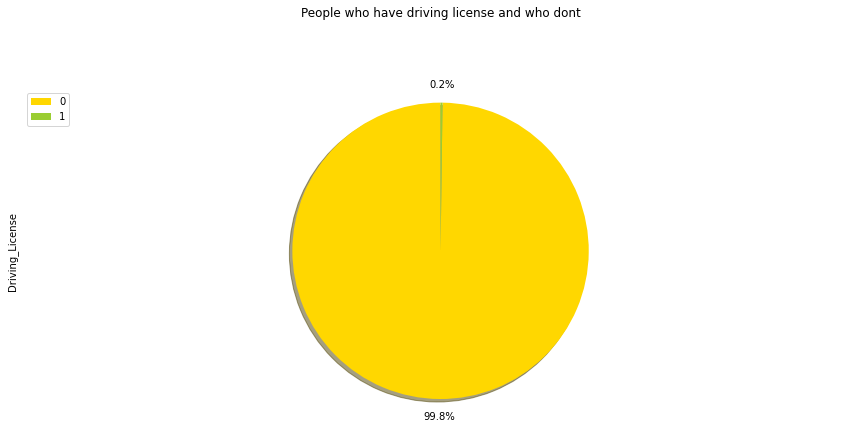

In [21]:
colors_list = ['gold', 'yellowgreen']

train['Driving_License'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('People who have driving license and who dont',y=1.2) 
plt.axis('equal') 

# add legend
plt.legend(labels=train.Driving_License.index, loc='upper left') 
plt.show()

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Region_Code', ylabel='count'>

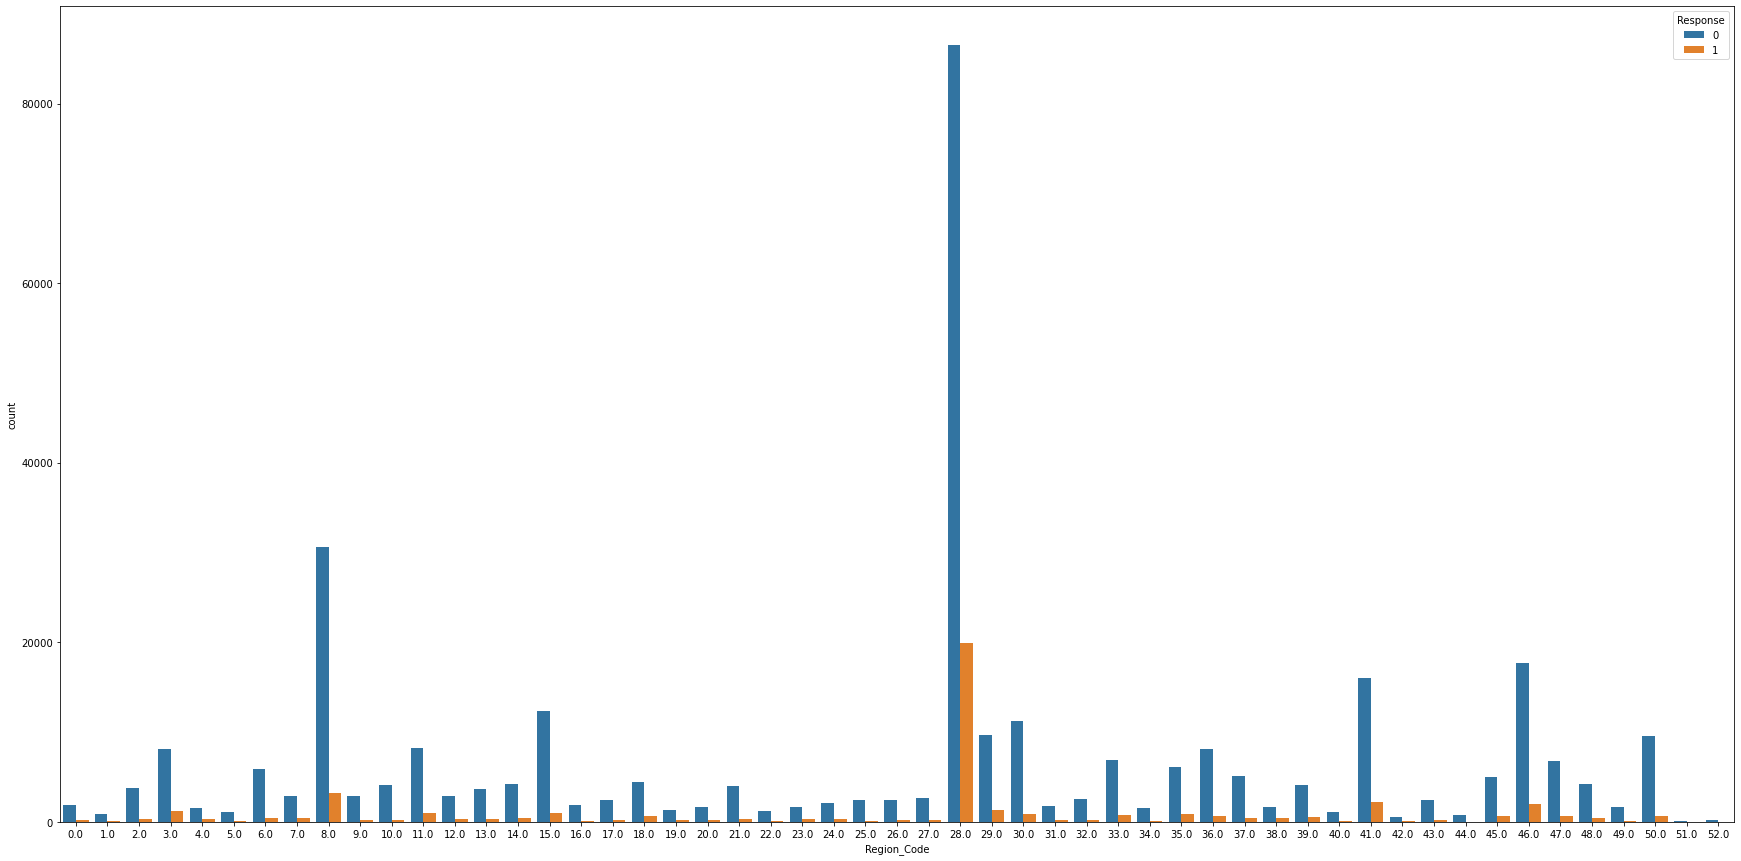

In [22]:
plt.figure(figsize=(30,15))
sns.countplot(train['Region_Code'],hue=train['Response'])

<p>region 28 - buys the insurance most as they are very high in numbers and<br>
   region 8  - comes 2nd in the list</p> 

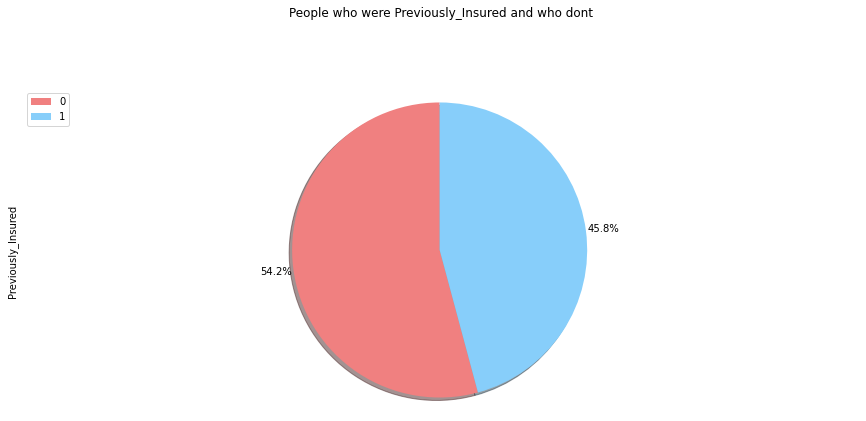

In [23]:
colors_list = ['lightcoral', 'lightskyblue']

train['Previously_Insured'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            )

# scale the title up by 12% to match pctdistance
plt.title('People who were Previously_Insured and who dont',y=1.2) 
plt.axis('equal') 

# add legend
plt.legend(labels=train.Previously_Insured.index, loc='upper left') 
plt.show()

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'People who were Previously_Insured and who dont'}, xlabel='Previously_Insured', ylabel='count'>

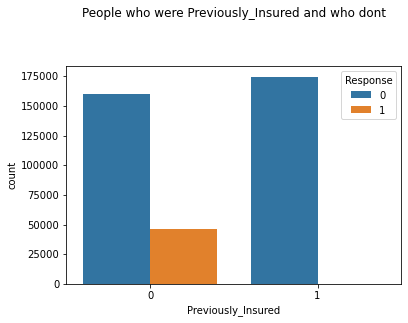

In [24]:
plt.title('People who were Previously_Insured and who dont',y=1.2) 
sns.countplot('Previously_Insured',hue='Response', data=train)

<p>People who were previously insured didnt purchase again </p>

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Estimate of people who bought insurance or not wrt there vehicle age'}, xlabel='Vehicle_Age', ylabel='count'>

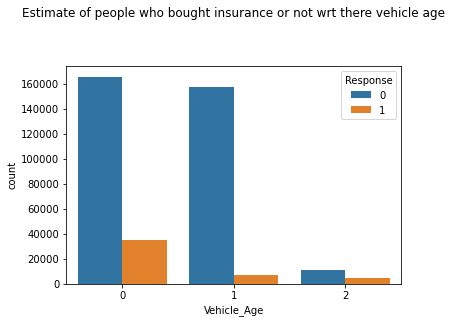

In [25]:
plt.title('Estimate of people who bought insurance or not wrt there vehicle age',y=1.2) 
sns.countplot('Vehicle_Age',hue='Response', data=train)

<p>people with vehicles age between 1-2 year is most probable to buy the insurance. <br>
people with vehicles age less than 1 year is less likely to buy the insurance  <br>
people with vehicles age greater than 2 year is most probable to buy the insurance</p>

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:title={'center':'Estimate of people who have vehicle damage and not'}, xlabel='Vehicle_Damage', ylabel='count'>

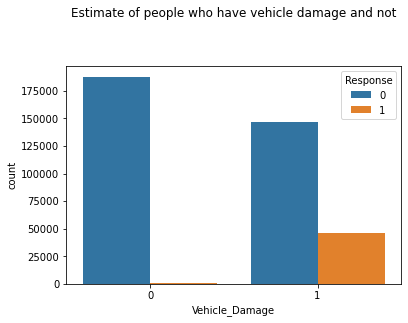

In [26]:
plt.title('Estimate of people who have vehicle damage and not',y=1.2) 
sns.countplot('Vehicle_Damage',hue='Response', data=train)

<p>People with vehicle damage is likely to purchase the insurance</p>

<AxesSubplot:>

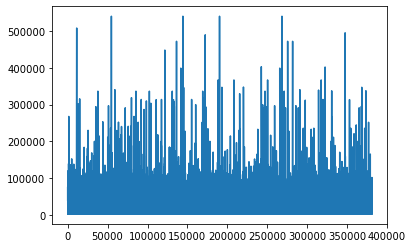

In [27]:
train['Annual_Premium'].plot()

<AxesSubplot:ylabel='Region_Code'>

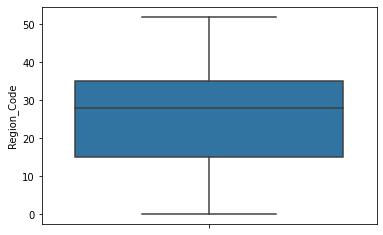

In [28]:
sns.boxplot(y='Region_Code',data=train)

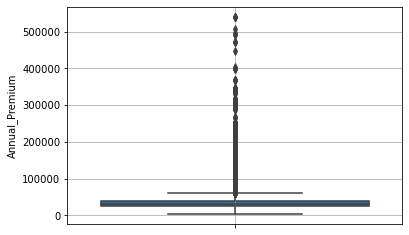

In [29]:
sns.boxplot(y='Annual_Premium',data=train)
plt.grid()

In [30]:
train['Vintage'].value_counts()

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [32]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [33]:
x=train[['Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]
y=train['Response']

<AxesSubplot:>

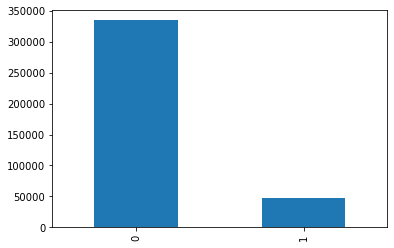

In [34]:
y.value_counts().plot(kind='bar')

In [35]:
scaler=StandardScaler()
x=scaler.fit(x).transform(x)

In [36]:
x

array([[ 0.92154476,  0.33377727,  0.04620794, ...,  0.99029399,
         0.57453868,  0.74879538],
       [ 0.92154476,  2.39675074,  0.04620794, ..., -1.00980114,
         0.17263624,  0.34244286],
       [ 0.92154476,  0.52718104,  0.04620794, ...,  0.99029399,
         0.4490531 , -1.52199808],
       ...,
       [ 0.92154476, -1.14898491,  0.04620794, ..., -1.00980114,
         0.26454281,  0.07950888],
       [-1.08513449,  1.88100737,  0.04620794, ...,  0.99029399,
         0.81638891, -0.96027549],
       [ 0.92154476,  0.46271311,  0.04620794, ..., -1.00980114,
         0.6513986 ,  0.98782627]])

In [37]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x, y = sm.fit_resample(x, y.ravel())

In [38]:
x_train, x_dev, y_train, y_dev = train_test_split(x, y, test_size=0.2)

In [39]:
print(x_train.shape, y_train.shape)
print (x_dev.shape, y_dev.shape)

(535038, 8) (535038,)
(133760, 8) (133760,)


# DT

In [40]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='gini',max_depth=30)
model1.fit(x_train,y_train)
dt_pred=model1.predict(x_dev)

In [41]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_dev,dt_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85     67010
           1       0.82      0.92      0.87     66750

    accuracy                           0.86    133760
   macro avg       0.86      0.86      0.86    133760
weighted avg       0.86      0.86      0.86    133760



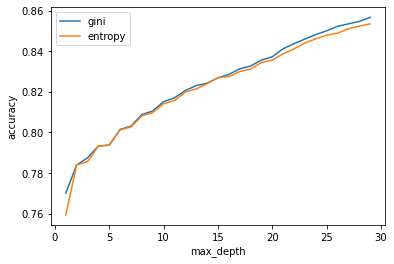

In [42]:
max_depth=[]
acc_gini=[]
acc_entropy=[]
for i in range(1,30):
    dtree=DecisionTreeClassifier(criterion='gini',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_dev)
    
    acc_gini.append(accuracy_score(y_dev,pred))
    
    dtree=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    dtree.fit(x_train,y_train)
    pred=dtree.predict(x_dev)
    
    acc_entropy.append(accuracy_score(y_dev,pred))
    
    max_depth.append(i)
    
    d=pd.DataFrame({'acc_gini': pd.Series(acc_gini),
                   'acc_entropy': pd.Series(acc_entropy),
                   'max_depth': pd.Series(max_depth)})
    
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [43]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_dev,dt_pred))
print(accuracy_score(y_dev,dt_pred))

0.8579682511470421
0.85784240430622


C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


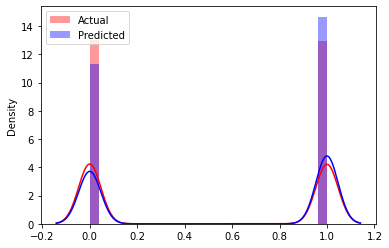

In [44]:
ax1=sns.distplot(y_dev,label='Actual',color='r')
sns.distplot(dt_pred,label='Predicted',color='b',ax=ax1)
plt.legend(loc='upper left')

# Logistic 

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV 

In [46]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

In [47]:
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
model2=LogisticRegression()
randomizedsearch = RandomizedSearchCV(model2, hyperparameters)

In [48]:
best_model=randomizedsearch.fit(x_train,y_train)

In [49]:
print(best_model.best_estimator_)

LogisticRegression(C=2.7825594022071245, solver='saga')


In [50]:
model2=LogisticRegression(C=464.15888336127773,solver='saga')
model2.fit(x_train,y_train)
lr_pred=model2.predict(x_dev)

In [51]:
print(classification_report(y_dev,lr_pred))
print(roc_auc_score(y_dev,lr_pred))
print(accuracy_score(y_dev,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73     67010
           1       0.70      0.98      0.82     66750

    accuracy                           0.78    133760
   macro avg       0.83      0.78      0.78    133760
weighted avg       0.83      0.78      0.78    133760

0.784426313474371
0.7840535287081339


C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


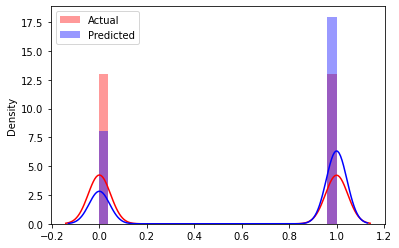

In [52]:
ax1=sns.distplot(y_dev,label='Actual',color='r')
sns.distplot(lr_pred,label='Predicted',color='b',ax=ax1)
plt.legend()

In [53]:
roc_auc_score(y_dev,lr_pred)

0.784426313474371

# LGBM

In [54]:
import lightgbm as lgb
d_train=lgb.Dataset(x_train,label=y_train)

params={}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
params['max_bin'] = 400
params['num_iterations']= 300

clf=lgb.train(params,d_train,200)


C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [55]:
y_pred=clf.predict(x_dev)

In [56]:
y_pred.shape

(133760,)

In [57]:
for i in range(0,133760):
    if y_pred[i]>=.5:
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [58]:
print(classification_report(y_dev,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78     67010
           1       0.74      0.94      0.83     66750

    accuracy                           0.81    133760
   macro avg       0.83      0.81      0.80    133760
weighted avg       0.83      0.81      0.80    133760



In [59]:
roc_auc_score(y_dev,y_pred)

0.8073502294643261

In [60]:
accuracy_score(y_dev,y_pred)

0.8070873205741627

C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ritik\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


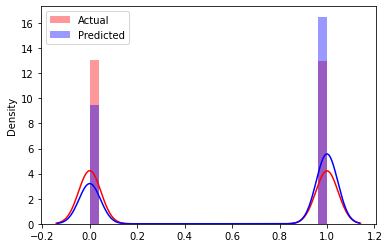

In [61]:
ax1=sns.distplot(y_dev,label='Actual',color='r')
sns.distplot(y_pred,label='Predicted',color='b',ax=ax1)
plt.legend()

# Test Set

In [62]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [63]:
test.shape

(127037, 11)

In [64]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [65]:
test['Gender'].replace('Male',1,inplace=True)
test['Gender'].replace('Female',0,inplace=True)
test['Vehicle_Damage'].replace('Yes',1,inplace=True)
test['Vehicle_Damage'].replace('No',0,inplace=True)
test['Vehicle_Age'].replace('1-2 Year',0,inplace=True)
test['Vehicle_Age'].replace('< 1 Year',1,inplace=True)
test['Vehicle_Age'].replace('> 2 Years',2,inplace=True)

In [72]:
x_test=test[['Gender','Age','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium','Vintage']]

In [73]:
x_test=scaler.fit(x_test).transform(x_test)

In [74]:
sub=pd.read_csv(r'G:\Essentials\Cross Sell Pred\sub.csv')

In [75]:
sub.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [76]:
x_test

array([[ 0.92829407, -0.89008939,  0.04323292, ..., -1.00499528,
         0.31049188, -1.21105399],
       [ 0.92829407,  0.07979548,  0.04323292, ...,  0.99502955,
         0.19104824, -0.51778208],
       [ 0.92829407,  0.53240842,  0.04323292, ...,  0.99502955,
         0.56212611,  0.53407873],
       ...,
       [ 0.92829407, -1.14872536,  0.04323292, ..., -1.00499528,
        -0.04264584, -0.96004175],
       [ 0.92829407,  2.08422421,  0.04323292, ..., -1.00499528,
         1.90911281,  1.32297434],
       [ 0.92829407,  0.14445447,  0.04323292, ..., -1.00499528,
        -0.15329644,  0.91657357]])

In [77]:
dtpred=model1.predict(x_test)
sub['Response']=dtpred
sub.to_csv(r"G:\Essentials\Cross Sell Pred\dt.csv",index=False)

In [78]:
lgbpred=clf.predict(x_test)
sub['Response']=lgbpred
sub.to_csv(r"G:\Essentials\Cross Sell Pred\lgb.csv",index=False)

<p> importing pickle file of best model

In [79]:
import pickle
pkl_filename="model.pkl"
with open(pkl_filename,'wb') as file:
    pickle.dump(model1,file)

In [80]:
%pwd

'C:\\Users\\ritik'

## Out of Decision tree, logisctic regression and LGBM, Decision tree is the best model